Index(['Month', '#Passengers'], dtype='object')


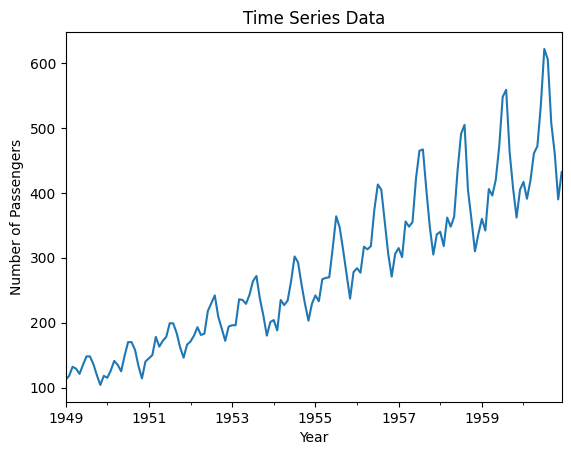

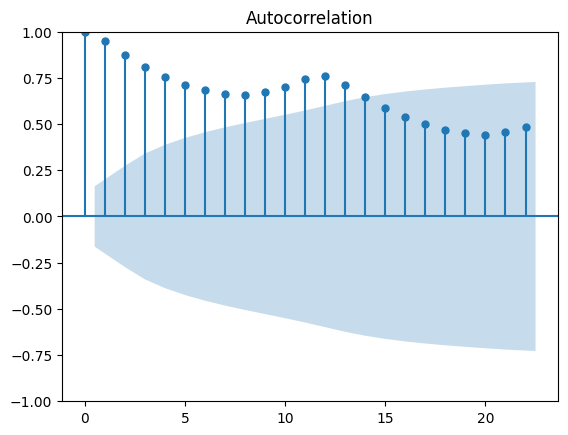

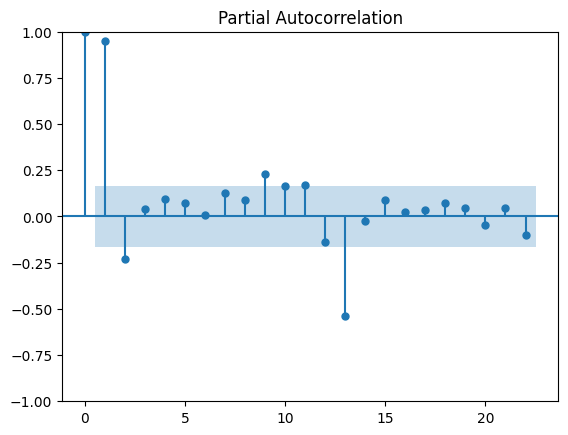

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-8-a8c5cb547e59>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=ts.i

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 01 Apr 2025   AIC                           1353.347
Time:                        03:07:51   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

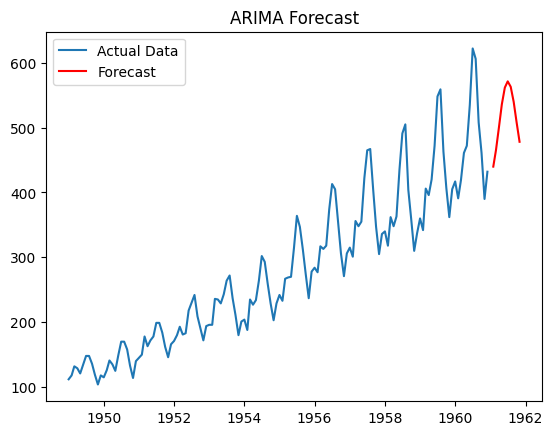

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


df = pd.read_csv('/content/AirPassengers.csv')
print(df.columns)

# Load your time series data (Replace with actual dataset)
df = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename column to ensure correct reference
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Extract time series
ts = df['Passengers']

# Plot the time series
ts.plot(title='Time Series Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Check autocorrelation and partial autocorrelation
plot_acf(ts)
plot_pacf(ts)
plt.show()

# Define ARIMA order (p, d, q)
p, d, q = 2, 1, 2  # Example values; tune based on data analysis

# Fit ARIMA model
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast_steps = 10  # Adjust as needed
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.plot(ts, label='Actual Data')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Calculate error if test data is available
# test_data = ... (Provide test data if available)
# mse = mean_squared_error(test_data, forecast)
# print(f'Mean Squared Error: {mse}')

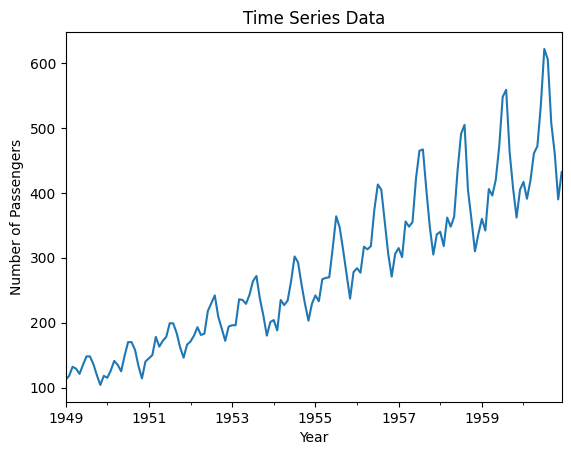

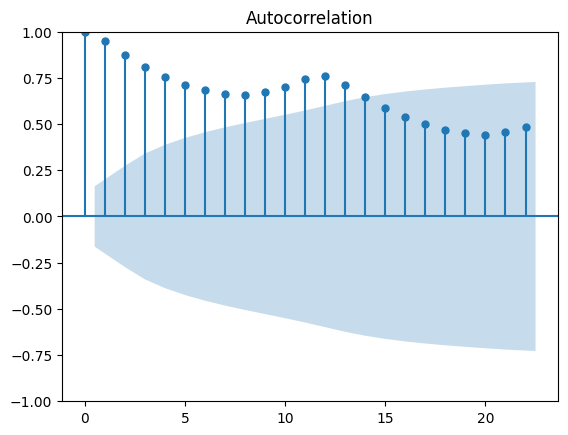

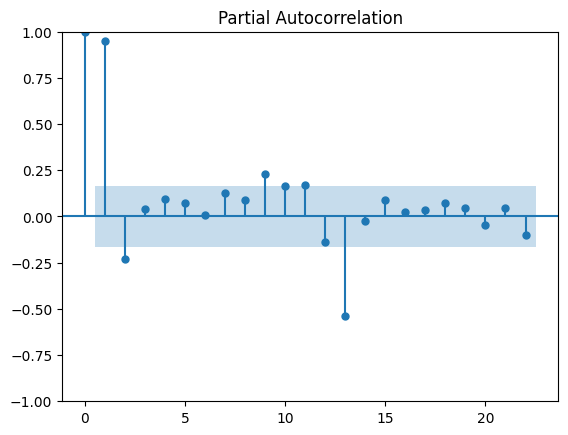

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 01 Apr 2025   AIC                           1353.347
Time:                        03:11:54   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

<ipython-input-9-086e04ba3b86>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:], arima_forecast, label='ARIMA Forecast', color='red')
<ipython-input-9-086e04ba3b86>:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')


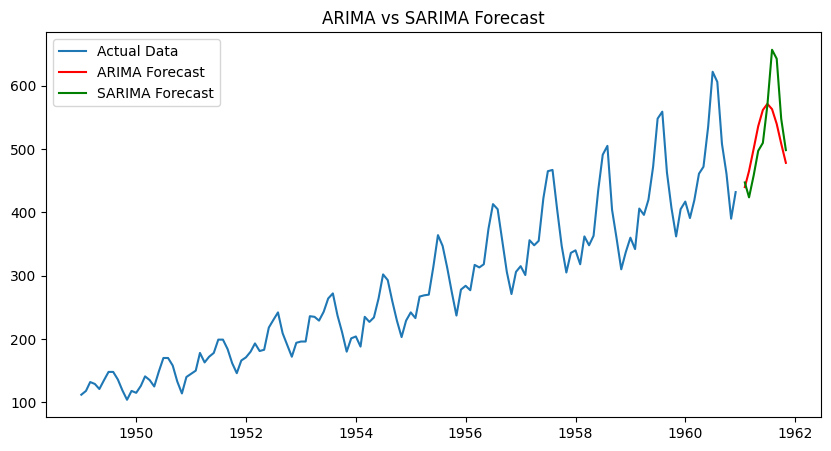

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load your time series data (Replace with actual dataset)
df = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename column to ensure correct reference
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Extract time series
ts = df['Passengers']

# Plot the time series
ts.plot(title='Time Series Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Check autocorrelation and partial autocorrelation
plot_acf(ts)
plot_pacf(ts)
plt.show()

# Define ARIMA order (p, d, q)
p, d, q = 2, 1, 2  # Example values; tune based on data analysis

# Fit ARIMA model
arima_model = ARIMA(ts, order=(p, d, q))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecasting with ARIMA
forecast_steps = 10  # Adjust as needed
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Define SARIMA order (p, d, q) x (P, D, Q, s)
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters for monthly data
sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

# Forecasting with SARIMA
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Plot ARIMA vs SARIMA forecasts
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Actual Data')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:], arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('ARIMA vs SARIMA Forecast')
plt.show()

# Calculate error if test data is available
# test_data = ... (Provide test data if available)
# arima_mse = mean_squared_error(test_data, arima_forecast)
# sarima_mse = mean_squared_error(test_data, sarima_forecast)
# print(f'ARIMA Mean Squared Error: {arima_mse}')
# print(f'SARIMA Mean Squared Error: {sarima_mse}')

# Why SARIMA?
# ARIMA works well for non-seasonal data, but when seasonality is present (e.g., monthly trends in air passengers),
# SARIMA helps capture these seasonal patterns more effectively by adding seasonal differencing and seasonal autoregressive/moving average components.
